In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataloaders import get_iterators

/home/rodrigo/Desktop/McGill/Research/initial-conditions/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
(train_dl, _, test_dl), norms = get_iterators(
    datapath='data', cached=True, batch_size=16, n_workers=8
    )

Using Checkpoint


In [ ]:
# For Histograms
arrays = list()
for x in train_dl:
    arrays.append(x)
arrays = torch.cat(arrays, dim=0)
arrays = arrays.permute((1,0,2,3)).flatten(start_dim=1, end_dim=-1)

for idx, array in enumerate(arrays):
    plt.hist(array, bins=25)
    plt.savefig(f'Results/dims_histplots/{idx}.png')
    plt.close()

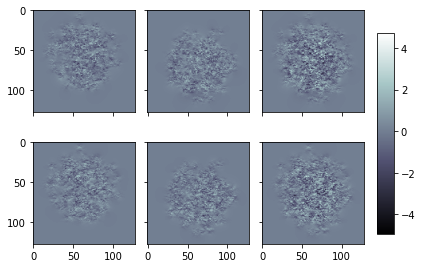

In [9]:
# For Visualizing results
def visualize_target_output(pred, y):
    pred, y = pred[0], y[0]
    pred, y = pred.mean(dim=0), y.mean(dim=0)

    minmin = torch.min(torch.tensor(
        [pred.min().item(), y.min().item()]
        ))

    maxmax = torch.max(torch.tensor(
        [pred.max().item(), y.max().item()]
        ))

    fig,axs = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True)
    im = axs[0].imshow(pred, vmin=minmin, vmax=maxmax, cmap='bone')
    im = axs[1].imshow(y, vmin=minmin, vmax=maxmax, cmap='bone')

    axs[0].set_title('Prediction')
    axs[1].set_title('Target')
    fig.tight_layout()

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    plt.show()


for x in test_dl:
    a, b, c = x[0,:16], x[0,16:32], x[0, 32:48]
    # a, b, c = a.mean(dim=0), b.mean(dim=0), c.mean(dim=0)
    # lap = tg.utils.get_mesh_laplacian(c)
    # rows = a.shape[0]
    rows = 2

    minmin = torch.min(torch.tensor(
        [a.min().item(), b.min().item(), c.min().item()]
        ))

    maxmax = torch.max(torch.tensor(
        [a.max().item(), b.max().item(), c.max().item()]
        ))

    fig,axs = plt.subplots(nrows=rows, ncols=3, sharey=True, sharex=True)
    for row in range(rows):
        im = axs[row, 0].imshow(a[row], vmin=minmin, vmax=maxmax, cmap='bone')
        im = axs[row, 1].imshow(b[row], vmin=minmin, vmax=maxmax, cmap='bone')
        im = axs[row, 2].imshow(c[row], vmin=minmin, vmax=maxmax, cmap='bone')
    fig.tight_layout()

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    plt.show()
    break